<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone

# Feature Selection
from sklearn.feature_selection import RFE, VarianceThreshold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Models and metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_pinball_loss, make_scorer
from sklearn.model_selection import ParameterGrid

from itertools import combinations
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd


### Load Data

Entao, em vez de usarmos o que foi feito na part 1 vamos correr a pipeline para todo e obter o X_train, test e o validation

In [2]:
#Load Dic
brand_model_dic = pd.read_parquet("./project_data/brand_model_dic.parquet", engine="pyarrow")

# Load the processed datasets (train, validation, test)
X_train = pd.read_parquet("./project_data/X_train.parquet", engine="pyarrow")
X_val   = pd.read_parquet("./project_data/X_val.parquet",   engine="pyarrow")
X_test  = pd.read_parquet("./project_data/X_test.parquet",  engine="pyarrow")

y_train = pd.read_parquet("./project_data/y_train.parquet", engine="pyarrow").squeeze("columns")
y_val   = pd.read_parquet("./project_data/y_val.parquet",   engine="pyarrow").squeeze("columns")

In [3]:
from preprocessing_pipeline import CarPreprocessingPipeline

# Correções manuais
manual_model_corrections = {
    'val': {'w123': 'e class', 'veloster': 'i30', 's5': 'a5', 'a2': 'a1'},
    'test': {'veloster': 'i30', 's5': 'a5', 'r class': 'gl class', 
             'amica': 'i10', 'rs7': 'rs6', 'i4': '3 series', 
             'transit courier': 'tourneo connect', '190': 'c class'}
}

# FIT e TRANSFORM
pipeline = CarPreprocessingPipeline(reference_year=2020)
pipeline.fit(X_train, y_train, brand_model_dic, manual_model_corrections=manual_model_corrections)

X_train_original = pipeline.transform(X_train, dataset_name="train")
X_val_original = pipeline.transform(X_val, dataset_name="val")
X_test_original = pipeline.transform(X_test, dataset_name="test")

# SAVE
#X_train_final.reset_index().to_parquet("./project_data/X_train_processed.parquet", index=False)
#X_val_final.reset_index().to_parquet("./project_data/X_val_processed.parquet", index=False)
#X_test_final.reset_index().to_parquet("./project_data/X_test_processed.parquet", index=False)
#pipeline.save("./project_data/car_pipeline_fitted.joblib")


[1/13] Preparando dicionário de referência...
[2/13] Normalizando Brand e model...
[3/13] Limpando Brand e model...
[4/13] Imputando models por engineSize...
[5/13] Forçando missing para needs_review...
[6/13] Limpando variáveis numéricas e categóricas...
[7/13] Calculando modas para imputação MCAR (model por Brand)...
[8/13] Identificando variáveis MAR...
[9/13] Fitting MICE imputer...
[10/13] Calculando tabela de modelos frequentes...
[11/13] Calculando parâmetros de feature engineering...


\\wsl.localhost\Ubuntu\home\mpais-go\ML_project\preprocessing_pipeline.py:718: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  keep_mask = X["keep"].fillna(False)


[12/13] Fitting encoders...
[13/13] Fitting final scaler...

✓ Pipeline fitted! Final shape: (60769, 38)
  Features: 38
  ✓ X_train transformado guardado internamente (use get_transformed_train())

TRANSFORMANDO TRAIN (60769 rows)

[1/11] Normalizando Brand e model...
[2/11] Limpando Brand e model...
[3/11] Imputando models por engineSize...
[4/11] Aplicando correções manuais...
[5/11] Limpando variáveis numéricas e categóricas...
[6/11] Imputando Brand e model (MCAR condicional)...
[7/11] Criando flags de missing...
[8/11] Aplicando MICE imputation...
[9/11] Colapsando modelos raros...


\\wsl.localhost\Ubuntu\home\mpais-go\ML_project\preprocessing_pipeline.py:718: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  keep_mask = X["keep"].fillna(False)


[10/11] Criando features...
[11/11] Aplicando encoding e scaling final...

✓ Transformação concluída! Shape final: (60769, 38)

TRANSFORMANDO VAL (15193 rows)

[1/11] Normalizando Brand e model...
[2/11] Limpando Brand e model...
[3/11] Imputando models por engineSize...
[4/11] Aplicando correções manuais...
[5/11] Limpando variáveis numéricas e categóricas...
[6/11] Imputando Brand e model (MCAR condicional)...
[7/11] Criando flags de missing...
[8/11] Aplicando MICE imputation...
[9/11] Colapsando modelos raros...
[10/11] Criando features...
[11/11] Aplicando encoding e scaling final...

✓ Transformação concluída! Shape final: (15193, 38)

TRANSFORMANDO TEST (32567 rows)


\\wsl.localhost\Ubuntu\home\mpais-go\ML_project\preprocessing_pipeline.py:718: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  keep_mask = X["keep"].fillna(False)



[1/11] Normalizando Brand e model...
[2/11] Limpando Brand e model...
[3/11] Imputando models por engineSize...
[4/11] Aplicando correções manuais...
[5/11] Limpando variáveis numéricas e categóricas...
[6/11] Imputando Brand e model (MCAR condicional)...
[7/11] Criando flags de missing...
[8/11] Aplicando MICE imputation...
[9/11] Colapsando modelos raros...
[10/11] Criando features...


\\wsl.localhost\Ubuntu\home\mpais-go\ML_project\preprocessing_pipeline.py:718: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  keep_mask = X["keep"].fillna(False)


[11/11] Aplicando encoding e scaling final...

✓ Transformação concluída! Shape final: (32567, 38)


In [4]:
palette = ['#5C4212','#a92f02', '#a55b1bf9', '#b08972', '#e3a76c', '#e5c120','#f39c06','#f2e209']

In [5]:
X_train_original.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage', 'mpg_is_missing', 'tax_is_missing',
       'engineSize_is_missing', 'year_is_missing', 'brand_mean_price',
       'brand_median_price', 'brand_price_std', 'brand_count', 'age',
       'is_new_car', 'is_old_car', 'miles_per_year', 'high_mileage',
       'low_mileage', 'age_mileage_interaction',
       'premium_brand_engine_size_interaction', 'tax_per_engine',
       'mpg_per_liter', 'Brand_target_enc', 'brand_model_target_enc',
       'transmission_manual', 'transmission_other', 'transmission_semi auto',
       'transmission_unknown', 'fuelType_electric', 'fuelType_hybrid',
       'fuelType_other', 'fuelType_petrol', 'fuelType_unknown',
       'brand_segment_luxury', 'brand_segment_mid_range'],
      dtype='object')

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

In [6]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# FUNÇÕES AUXILIARES
# ============================================================================

def plot_importance_unified(importance_series, name, is_tree_model=False):
    """Plota top 20 features por importância"""
    imp_coef = importance_series.sort_values(ascending=False).head(20)
    
    color = palette[1] if is_tree_model else palette[0]
    plt.figure(figsize=(9, 6))
    imp_coef.sort_values().plot(kind="barh", color=color) 
    
    plt.title(f"Feature Importance using {name} Model (Top 20)", fontsize=15)
    plt.xlabel("Magnitude of Coefficient / Gini Importance")
    plt.tight_layout()
    plt.show()


def print_selection_results(importance_series, model_name, selection_method="mean", threshold=None):
    if selection_method == "nonzero":
        selected_feats = importance_series[importance_series != 0].index.tolist()
        criteria_msg = "Coefficient != 0"
    elif selection_method == "threshold" and threshold is not None:
        selected_feats = importance_series[importance_series > threshold].index.tolist()
        criteria_msg = f"Importance > {threshold:.4f}"
    else:
        # Default: seleciona acima da média
        threshold_val = importance_series.mean()
        selected_feats = importance_series[importance_series > threshold_val].index.tolist()
        criteria_msg = f"Importance > Mean ({threshold_val:.4f})"

    print(f"\n" + "-"*60)
    print(f"MODEL: {model_name}")
    print(f"Selection Criteria: {criteria_msg}")
    print(f"Number of features selected: {len(selected_feats)}")
    print(f"Selected Features: {selected_feats}")
    print("-"*60 + "\n")
    
    return selected_feats


def plot_feature_comparison(gb_imp, rf_imp, knn_imp, top_n=15):
    """Compara importância entre os 3 modelos"""
    
    # Pegar top N de cada
    top_gb = set(gb_imp.head(top_n).index)
    top_rf = set(rf_imp.head(top_n).index)
    top_knn = set(knn_imp.head(top_n).index)
    
    # União de todos
    all_top = list(top_gb | top_rf | top_knn)
    
    # Criar DataFrame comparativo
    comparison_df = pd.DataFrame({
        'GB': [gb_imp.get(f, 0) for f in all_top],
        'RF': [rf_imp.get(f, 0) for f in all_top],
        'KNN': [knn_imp.get(f, 0) for f in all_top]
    }, index=all_top)
    
    # Normalizar para comparação
    comparison_df = comparison_df.div(comparison_df.max(axis=0), axis=1)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    comparison_df.sort_values('GB', ascending=True).plot(kind='barh', ax=ax, width=0.8)
    
    plt.title(f"Feature Importance Comparison (Top {top_n} per model, normalized)", fontsize=15)
    plt.xlabel("Normalized Importance (0-1)")
    plt.ylabel("Features")
    plt.legend(title="Model", loc='lower right')
    plt.tight_layout()
    plt.show()


def plot_overlap_venn(gb_feats, rf_feats, knn_feats):
    """Mostra overlap de features entre modelos (textual)"""
    gb_set = set(gb_feats)
    rf_set = set(rf_feats)
    knn_set = set(knn_feats)
    
    all_three = gb_set & rf_set & knn_set
    gb_rf = (gb_set & rf_set) - all_three
    gb_knn = (gb_set & knn_set) - all_three
    rf_knn = (rf_set & knn_set) - all_three
    
    only_gb = gb_set - rf_set - knn_set
    only_rf = rf_set - gb_set - knn_set
    only_knn = knn_set - gb_set - rf_set
    
    print("\n" + "="*70)
    print("📊 ANÁLISE DE OVERLAP DE FEATURES")
    print("="*70)
    
    print(f"\n✅ Todos os 3 modelos ({len(all_three)}):")
    print(f"   {sorted(list(all_three))}")
    
    print(f"\n🔶 GB + RF apenas ({len(gb_rf)}):")
    print(f"   {sorted(list(gb_rf))}")
    
    print(f"\n🔵 GB + KNN apenas ({len(gb_knn)}):")
    print(f"   {sorted(list(gb_knn))}")
    
    print(f"\n🟣 RF + KNN apenas ({len(rf_knn)}):")
    print(f"   {sorted(list(rf_knn))}")
    
    print(f"\n💠 Apenas GB ({len(only_gb)}):")
    print(f"   {sorted(list(only_gb))}")
    
    print(f"\n🟠 Apenas RF ({len(only_rf)}):")
    print(f"   {sorted(list(only_rf))}")
    
    print(f"\n🔷 Apenas KNN ({len(only_knn)}):")
    print(f"   {sorted(list(only_knn))}")
    
    print("\n" + "="*70)



In [7]:
all_features = list(X_train_original.columns)
n_features = len(all_features)

# Targets
y_train_array = y_train['price'].values if isinstance(y_train, pd.DataFrame) else y_train.values.ravel()
y_val_array = y_val['price'].values if isinstance(y_val, pd.DataFrame) else y_val.values.ravel()

# Dataset completo
X_train_full = pd.concat([X_train_original, X_val_original], axis=0)
y_train_full = np.concatenate([y_train_array, y_val_array])


<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.1 |  Embedded Methods</b></span>
    </h1>
</div>

Feature Importance

   1. Gradient Boosting... ✓
   2. Random Forest... ✓
   3. K-Neighbors (correlação)... ✓

📊 Gerando visualizações de importância...

   Plotando GB importance...


c:\Users\Utilizador\anaconda3\envs\Fall2526\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Utilizador\anaconda3\envs\Fall2526\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


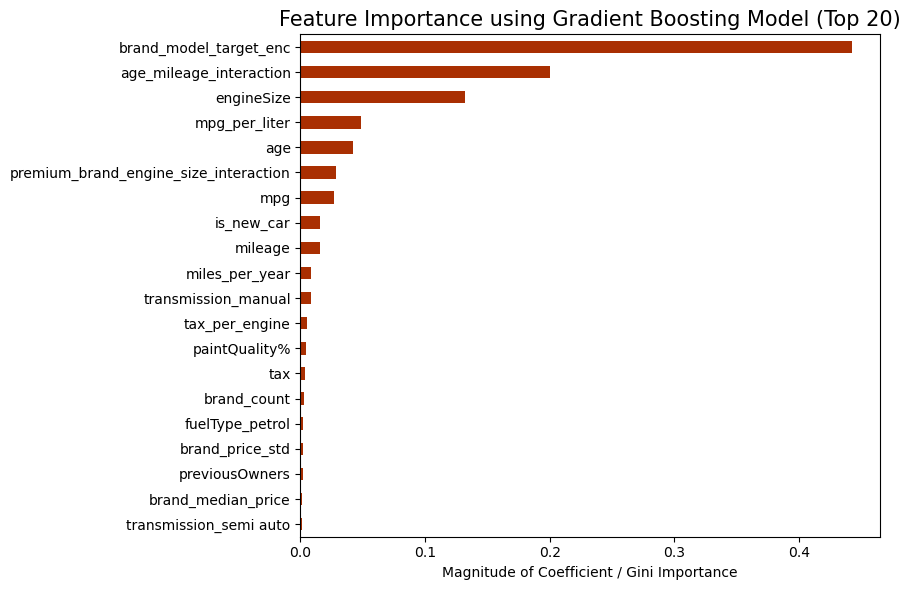

   Plotando RF importance...


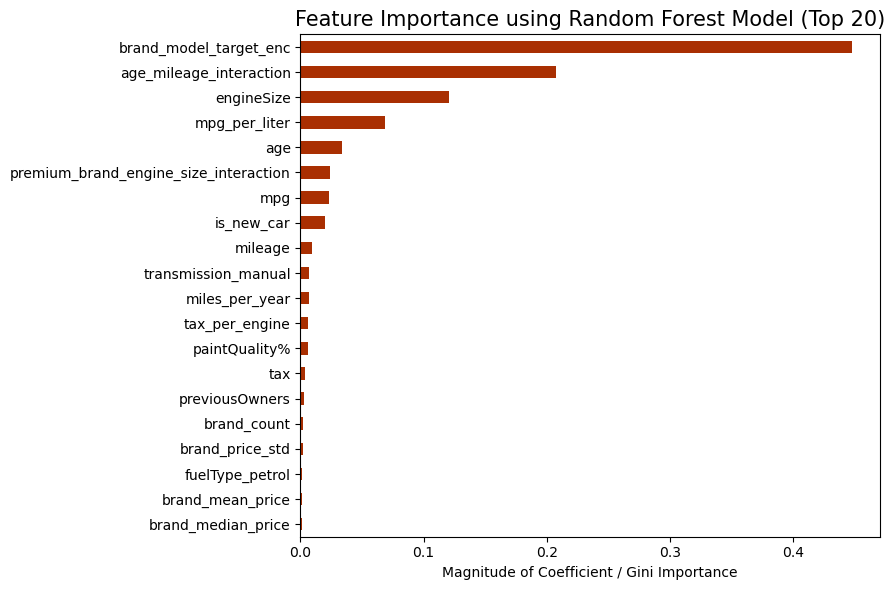

   Plotando KNN importance...


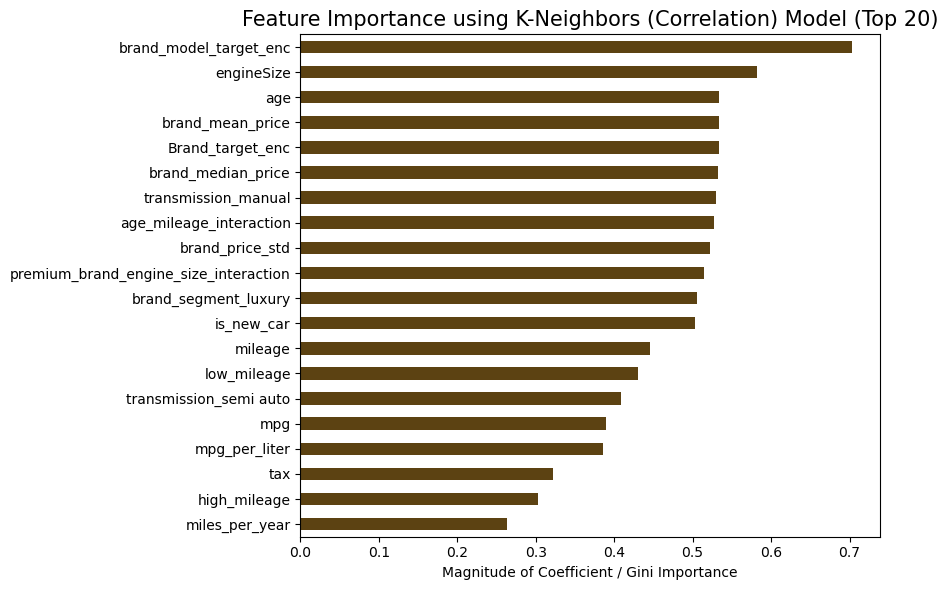

   Plotando comparação entre modelos...


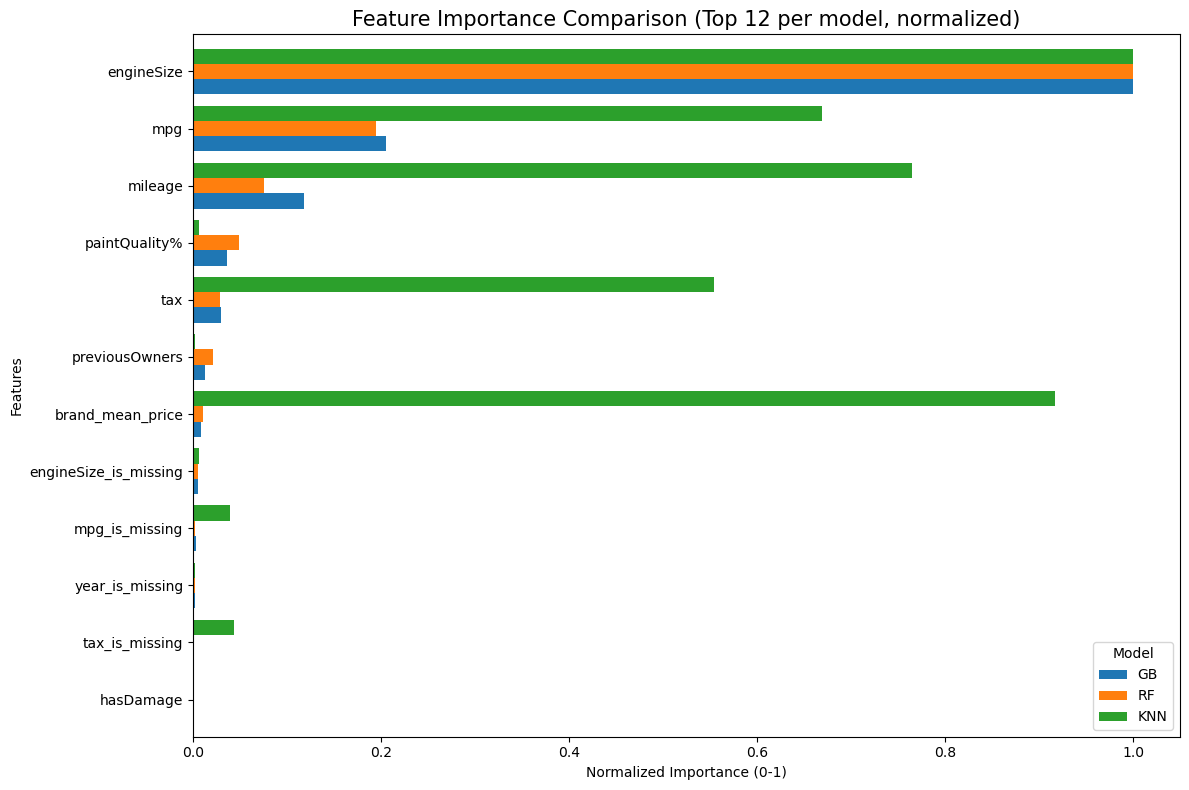

In [8]:
# ---------- GB ----------
print("   1. Gradient Boosting...", end=" ", flush=True)
gb_base = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=10, min_samples_leaf=5,
    n_estimators=500, subsample=0.9, random_state=37, verbose=0
)
gb_base.fit(X_train_original, y_train_array)
gb_importance_values = pd.Series(gb_base.feature_importances_, index=all_features)
print("✓")

# ---------- RF ----------
print("   2. Random Forest...", end=" ", flush=True)
rf_base = RandomForestRegressor(
    n_estimators=200, max_depth=20, min_samples_leaf=2,
    random_state=37, n_jobs=-1, verbose=0
)
rf_base.fit(X_train_original, y_train_array)
rf_importance_values = pd.Series(rf_base.feature_importances_, index=all_features)
print("✓")

# ---------- KNN ----------
print("   3. K-Neighbors (correlação)...", end=" ", flush=True)
knn_importance_dict = {}
for feat in all_features:
    corr = np.abs(np.corrcoef(X_train_original[feat], y_train_array)[0, 1])
    knn_importance_dict[feat] = corr
knn_importance_values = pd.Series(knn_importance_dict)
print("✓")

# Criar DataFrames para análise
gb_importance = pd.DataFrame({
    'feature': all_features,
    'importance': gb_importance_values.values
}).sort_values('importance', ascending=False).reset_index(drop=True)

rf_importance = pd.DataFrame({
    'feature': all_features,
    'importance': rf_importance_values.values
}).sort_values('importance', ascending=False).reset_index(drop=True)

knn_importance = pd.DataFrame({
    'feature': all_features,
    'importance': knn_importance_values.values
}).sort_values('importance', ascending=False).reset_index(drop=True)

# ============================================================================
# VISUALIZAÇÕES - PARTE 1
# ============================================================================
print("\n📊 Gerando visualizações de importância...\n")

# Plot individual
print("   Plotando GB importance...")
plot_importance_unified(gb_importance_values, "Gradient Boosting", is_tree_model=True)

print("   Plotando RF importance...")
plot_importance_unified(rf_importance_values, "Random Forest", is_tree_model=True)

print("   Plotando KNN importance...")
plot_importance_unified(knn_importance_values, "K-Neighbors (Correlation)", is_tree_model=False)

# Plot comparativo
print("   Plotando comparação entre modelos...")
plot_feature_comparison(gb_importance_values, rf_importance_values, knn_importance_values, top_n=12)


TESTAR TOP-N FEATURES (baseado em Feature Importance)
Tempo estimado: 30 segundos

🔍 Testando diferentes números de features...

Testing 8 features:

   1. GB (top 8)... ✓ VAL MAE: £1,327.96
   2. RF (top 8)... ✓ VAL MAE: £1,383.10
   3. KNN (top 8)... ✓ VAL MAE: £1,590.54

Testing 9 features:

   1. GB (top 9)... ✓ VAL MAE: £1,315.93
   2. RF (top 9)... ✓ VAL MAE: £1,378.21
   3. KNN (top 9)... ✓ VAL MAE: £1,588.33

Testing 10 features:

   1. GB (top 10)... ✓ VAL MAE: £1,325.76
   2. RF (top 10)... ✓ VAL MAE: £1,347.45
   3. KNN (top 10)... ✓ VAL MAE: £1,588.14

Testing 11 features:

   1. GB (top 11)... ✓ VAL MAE: £1,295.35
   2. RF (top 11)... ✓ VAL MAE: £1,348.88
   3. KNN (top 11)... ✓ VAL MAE: £1,588.16

Testing 12 features:

   1. GB (top 12)... ✓ VAL MAE: £1,284.89
   2. RF (top 12)... ✓ VAL MAE: £1,339.97
   3. KNN (top 12)... ✓ VAL MAE: £1,588.48

📊 RESULTADOS - NÚMERO ÓTIMO DE FEATURES

🔷 GRADIENT BOOSTING:
 n  train_mae     val_mae
 8 822.404258 1327.964403
 9 749.255542 1

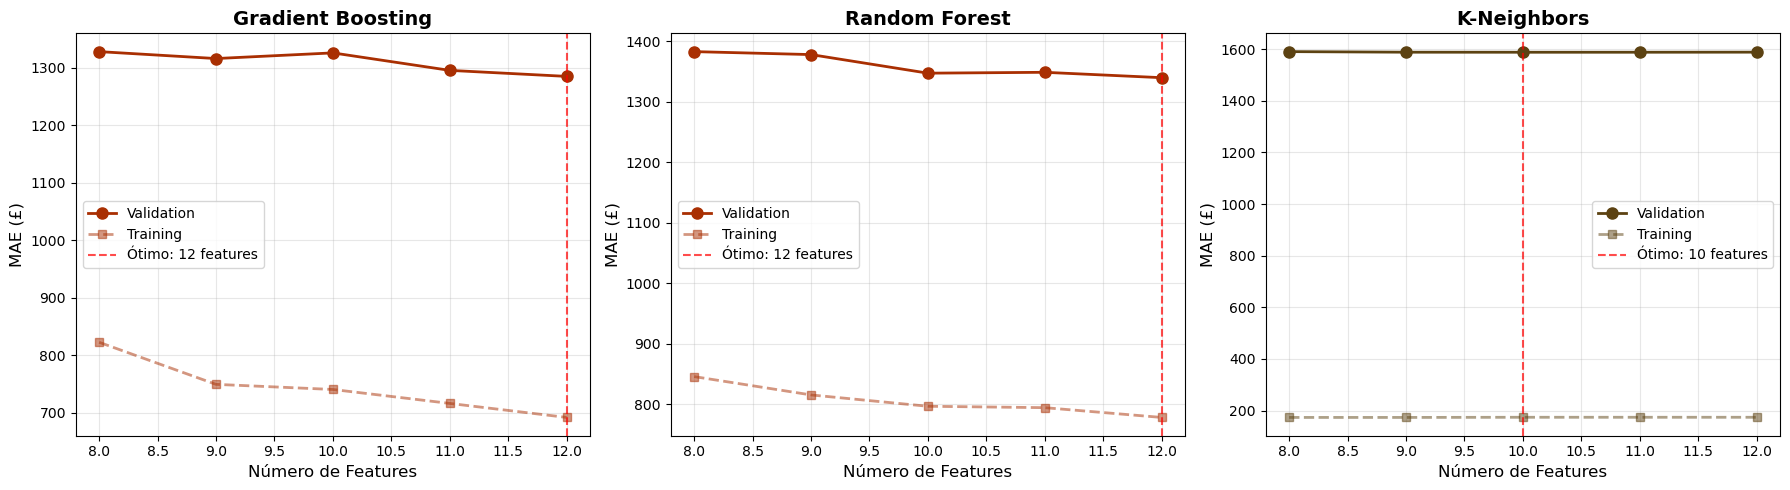


✅ ANÁLISE COMPLETA EM 30 SEGUNDOS!

🎯 PRÓXIMO PASSO:
   Usar estes números ótimos de features para:
   1. Comparar com baseline (todas features)
   2. Re-treinar com train+val
   3. Gerar submissões para Kaggle


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

# ============================================================================
# TESTAR TOP-N FEATURES (USANDO IMPORTANCE JÁ CALCULADO)
# ============================================================================
print("="*70)
print("TESTAR TOP-N FEATURES (baseado em Feature Importance)")
print("Tempo estimado: 30 segundos")
print("="*70)

# Range de features a testar
n_range = range(8, 13)  # [8, 9, 10, 11, 12]

results = {
    'GB': [],
    'RF': [],
    'KNN': []
}

print("\n🔍 Testando diferentes números de features...\n")

for n in n_range:
    print(f"{'='*70}")
    print(f"Testing {n} features:")
    print(f"{'='*70}")
    
    # ---------- GB ----------
    gb_features = gb_importance.head(n)['feature'].tolist()
    
    print(f"\n   1. GB (top {n})...", end=" ", flush=True)
    gb_model = GradientBoostingRegressor(
        learning_rate=0.1, max_depth=10, min_samples_leaf=5,
        n_estimators=500, subsample=0.9, random_state=37, verbose=0
    )
    gb_model.fit(X_train_original[gb_features], y_train_array)
    
    gb_train_pred = gb_model.predict(X_train_original[gb_features])
    gb_val_pred = gb_model.predict(X_val_original[gb_features])
    
    gb_train_mae = mean_absolute_error(y_train_array, gb_train_pred)
    gb_val_mae = mean_absolute_error(y_val_array, gb_val_pred)
    
    results['GB'].append({
        'n': n,
        'features': gb_features,
        'train_mae': gb_train_mae,
        'val_mae': gb_val_mae
    })
    
    print(f"✓ VAL MAE: £{gb_val_mae:,.2f}")
    
    # ---------- RF ----------
    rf_features = rf_importance.head(n)['feature'].tolist()
    
    print(f"   2. RF (top {n})...", end=" ", flush=True)
    rf_model = RandomForestRegressor(
        n_estimators=200, max_depth=20, min_samples_leaf=2,
        random_state=37, n_jobs=-1, verbose=0
    )
    rf_model.fit(X_train_original[rf_features], y_train_array)
    
    rf_train_pred = rf_model.predict(X_train_original[rf_features])
    rf_val_pred = rf_model.predict(X_val_original[rf_features])
    
    rf_train_mae = mean_absolute_error(y_train_array, rf_train_pred)
    rf_val_mae = mean_absolute_error(y_val_array, rf_val_pred)
    
    results['RF'].append({
        'n': n,
        'features': rf_features,
        'train_mae': rf_train_mae,
        'val_mae': rf_val_mae
    })
    
    print(f"✓ VAL MAE: £{rf_val_mae:,.2f}")
    
    # ---------- KNN ----------
    knn_features = knn_importance.head(n)['feature'].tolist()
    
    print(f"   3. KNN (top {n})...", end=" ", flush=True)
    knn_model = KNeighborsRegressor(n_neighbors=7, weights='distance', n_jobs=-1)
    knn_model.fit(X_train_original[knn_features], y_train_array)
    
    knn_train_pred = knn_model.predict(X_train_original[knn_features])
    knn_val_pred = knn_model.predict(X_val_original[knn_features])
    
    knn_train_mae = mean_absolute_error(y_train_array, knn_train_pred)
    knn_val_mae = mean_absolute_error(y_val_array, knn_val_pred)
    
    results['KNN'].append({
        'n': n,
        'features': knn_features,
        'train_mae': knn_train_mae,
        'val_mae': knn_val_mae
    })
    
    print(f"✓ VAL MAE: £{knn_val_mae:,.2f}\n")

# ============================================================================
# ANÁLISE DOS RESULTADOS
# ============================================================================
print("="*70)
print("RESULTADOS - NÚMERO ÓTIMO DE FEATURES")
print("="*70)

# GB
gb_df = pd.DataFrame(results['GB'])
best_gb = gb_df.loc[gb_df['val_mae'].idxmin()]

print("\n🔷GRADIENT BOOSTING:")
print(gb_df[['n', 'train_mae', 'val_mae']].to_string(index=False))
print(f"\n   ⭐ ÓTIMO: {int(best_gb['n'])} features → VAL MAE: £{best_gb['val_mae']:,.2f}")
print(f"   Features: {best_gb['features']}")

# RF
rf_df = pd.DataFrame(results['RF'])
best_rf = rf_df.loc[rf_df['val_mae'].idxmin()]

print("\n RANDOM FOREST:")
print(rf_df[['n', 'train_mae', 'val_mae']].to_string(index=False))
print(f"\n   ⭐ ÓTIMO: {int(best_rf['n'])} features → VAL MAE: £{best_rf['val_mae']:,.2f}")
print(f"   Features: {best_rf['features']}")

# KNN
knn_df = pd.DataFrame(results['KNN'])
best_knn = knn_df.loc[knn_df['val_mae'].idxmin()]

print("\n K-NEIGHBORS:")
print(knn_df[['n', 'train_mae', 'val_mae']].to_string(index=False))
print(f"\n   ÓTIMO: {int(best_knn['n'])} features → VAL MAE: £{best_knn['val_mae']:,.2f}")
print(f"   Features: {best_knn['features']}")

# ============================================================================
# VISUALIZAÇÕES
# ============================================================================
print("\nPloting visuals...\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# GB
axes[0].plot(gb_df['n'], gb_df['val_mae'], marker='o', linewidth=2, 
             markersize=8, color=palette[1], label='Validation')
axes[0].plot(gb_df['n'], gb_df['train_mae'], marker='s', linewidth=2, 
             markersize=6, color=palette[1], alpha=0.5, linestyle='--', label='Training')
axes[0].axvline(best_gb['n'], color='red', linestyle='--', alpha=0.7, 
                label=f"Ótimo: {int(best_gb['n'])} features")
axes[0].set_xlabel('Número de Features', fontsize=12)
axes[0].set_ylabel('MAE (£)', fontsize=12)
axes[0].set_title('Gradient Boosting', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RF
axes[1].plot(rf_df['n'], rf_df['val_mae'], marker='o', linewidth=2, 
             markersize=8, color=palette[1], label='Validation')
axes[1].plot(rf_df['n'], rf_df['train_mae'], marker='s', linewidth=2, 
             markersize=6, color=palette[1], alpha=0.5, linestyle='--', label='Training')
axes[1].axvline(best_rf['n'], color='red', linestyle='--', alpha=0.7, 
                label=f"Ótimo: {int(best_rf['n'])} features")
axes[1].set_xlabel('Número de Features', fontsize=12)
axes[1].set_ylabel('MAE (£)', fontsize=12)
axes[1].set_title('Random Forest', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# KNN
axes[2].plot(knn_df['n'], knn_df['val_mae'], marker='o', linewidth=2, 
             markersize=8, color=palette[0], label='Validation')
axes[2].plot(knn_df['n'], knn_df['train_mae'], marker='s', linewidth=2, 
             markersize=6, color=palette[0], alpha=0.5, linestyle='--', label='Training')
axes[2].axvline(best_knn['n'], color='red', linestyle='--', alpha=0.7, 
                label=f"Ótimo: {int(best_knn['n'])} features")
axes[2].set_xlabel('Número de Features', fontsize=12)
axes[2].set_ylabel('MAE (£)', fontsize=12)
axes[2].set_title('K-Neighbors', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# GUARDAR RESULTADOS PARA PRÓXIMA FASE
# ============================================================================
best_results = {
    'GB': {
        'n': int(best_gb['n']),
        'features': best_gb['features'],
        'val_mae': best_gb['val_mae']
    },
    'RF': {
        'n': int(best_rf['n']),
        'features': best_rf['features'],
        'val_mae': best_rf['val_mae']
    },
    'KNN': {
        'n': int(best_knn['n']),
        'features': best_knn['features'],
        'val_mae': best_knn['val_mae']
    }
}

# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>



In [16]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    scores = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Val MAE': mean_absolute_error(y_val, y_val_pred),
        'Train RMSE': root_mean_squared_error(y_train, y_train_pred),
        'Val RMSE': root_mean_squared_error(y_val, y_val_pred),
        'Train Pinball (α=0.5)': mean_pinball_loss(y_train, y_train_pred, alpha=0.5),
        'Val Pinball (α=0.5)': mean_pinball_loss(y_val, y_val_pred, alpha=0.5)
    }
    return scores

In [19]:
print(f"\nSelected Features:")
print(f"   GB:  {best_results['GB']['n']} features")
print(f"   RF:  {best_results['RF']['n']} features")
print(f"   KNN: {best_results['KNN']['n']} features\n")

models_and_grids = {
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=37),
        "features": best_results['GB']['features'], 
        "params": {
            'learning_rate': [0.1],
            'max_depth': [10, 12],
            'min_samples_leaf': [3, 5],
            'n_estimators': [400, 600],
            'subsample': [0.85, 0.9]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=37, n_jobs=-1),
        "features": best_results['RF']['features'], 
        "params": {
            'n_estimators': [100],
            'max_depth': [10, 20, 30],
            'min_samples_leaf': [2, 4, 6]
        }
    },
    "K-Neighbors": {
        "model": KNeighborsRegressor(n_jobs=-1),
        "features": best_results['KNN']['features'], 
        "params": {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance']
        }
    }
}


Selected Features:
   GB:  12 features
   RF:  12 features
   KNN: 10 features



In [20]:

results_list = []

for model_name, config in models_and_grids.items():
    print(f"\n{'='*70}")
    print(f"Processing: {model_name}")
    print(f"Features: {len(config['features'])} selected")
    print(f"{'='*70}")
    
    param_grid = ParameterGrid(config['params'])
    best_model_results = None
    best_val_mae = float('inf')
    
    # Get model-specific features
    model_features = config['features']
    X_train_subset = X_train_original[model_features]
    X_val_subset = X_val_original[model_features]
    
    print(f"\n   Total combinations: {len(list(param_grid))}")
    print(f"   Testing...\n")
    
    # Grid search
    for i, params in enumerate(param_grid, 1):
        model = config['model']
        model.set_params(**params)
        
        # Fit with model-specific features
        model.fit(X_train_subset, y_train_array)
        
        # Evaluate
        scores = evaluate_model(model, X_train_subset, y_train_array, 
                               X_val_subset, y_val_array)
        
        # Progress
        if i % max(1, len(list(param_grid)) // 5) == 0:
            print(f"   [{i}/{len(list(param_grid))}] Params: {params}")
            print(f"           Val MAE: £{scores['Val MAE']:,.2f}")
        
        # Store best
        if scores['Val MAE'] < best_val_mae:
            best_val_mae = scores['Val MAE']
            best_model_results = {
                'Model': model_name,
                'N Features': len(model_features),
                'Best Params': str(params),
                **scores
            }
    
    results_list.append(best_model_results)
    print(f"\n   ✅ Best Val MAE: £{best_val_mae:,.2f}")


# ============================================================================
# FINAL RESULTS
# ============================================================================
print("\n" + "="*70)
print("📊 FINAL RESULTS")
print("="*70)

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by='Val MAE', ascending=True)

columns_order = [
    'Model', 'N Features', 'Val MAE', 'Train MAE', 'Val RMSE', 'Train RMSE',
    'Val Pinball (α=0.5)', 'Train Pinball (α=0.5)', 'Best Params'
]
results_df = results_df[columns_order]

print("\n")
display(results_df)



Processing: Gradient Boosting
Features: 12 selected

   Total combinations: 16
   Testing...

   [3/16] Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 600, 'subsample': 0.85}
           Val MAE: £1,284.24
   [6/16] Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 400, 'subsample': 0.9}
           Val MAE: £1,285.06
   [9/16] Params: {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 3, 'n_estimators': 400, 'subsample': 0.85}
           Val MAE: £1,298.38
   [12/16] Params: {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 3, 'n_estimators': 600, 'subsample': 0.9}
           Val MAE: £1,298.26
   [15/16] Params: {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 5, 'n_estimators': 600, 'subsample': 0.85}
           Val MAE: £1,309.34

   ✅ Best Val MAE: £1,280.83

Processing: Random Forest
Features: 12 selected

   Total combinations: 9
   Testing...

   [1/9] Params: {'max_depth':

,Model,N Features,Val MAE,Train MAE,Val RMSE,Train RMSE,Val Pinball (α=0.5),Train Pinball (α=0.5),Best Params
0,Gradient Boosting,12,1280.826448,676.987920,2176.428701,953.326630,640.413224,338.493960,"{'learning_rate': 0.1, 'max_depth': 10, 'min_s..."
1,Random Forest,12,1344.035187,781.543704,2321.714569,1367.299993,672.017594,390.771852,"{'max_depth': 20, 'min_samples_leaf': 2, 'n_es..."
2,K-Neighbors,10,1579.571259,171.497178,2905.820556,1008.830473,789.785629,85.748589,"{'n_neighbors': 10, 'weights': 'distance'}"


ENSEMBLE 

In [21]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

# ============================================================================
# PASSO 2: ENSEMBLE COM TRAIN/VAL (AVALIAR PERFORMANCE)
# ============================================================================
print("="*70)
print("PASSO 2: ENSEMBLE 80/15/5 (train → val)")
print("="*70)

print("\n📊 Usando melhores hiperparâmetros do Grid Search...")

# ---- Extrair melhores params do results_df ----
best_gb_params = eval(results_df[results_df['Model'] == 'Gradient Boosting']['Best Params'].values[0])
best_rf_params = eval(results_df[results_df['Model'] == 'Random Forest']['Best Params'].values[0])
best_knn_params = eval(results_df[results_df['Model'] == 'K-Neighbors']['Best Params'].values[0])

gb_features = best_results['GB']['features']
rf_features = best_results['RF']['features']
knn_features = best_results['KNN']['features']

print(f"\n   GB params: {best_gb_params}")
print(f"   RF params: {best_rf_params}")
print(f"   KNN params: {best_knn_params}")

# ---- Treinar modelos individuais (train apenas) ----
print("\n🔍 Treinando modelos individuais...\n")

print("   1. Gradient Boosting...", end=" ", flush=True)
gb_model = GradientBoostingRegressor(**best_gb_params, random_state=37, verbose=0)
gb_model.fit(X_train_original[gb_features], y_train_array)
gb_val_pred = gb_model.predict(X_val_original[gb_features])
gb_val_mae = mean_absolute_error(y_val_array, gb_val_pred)
print(f"✓ VAL MAE: £{gb_val_mae:,.2f}")

print("   2. Random Forest...", end=" ", flush=True)
rf_model = RandomForestRegressor(**best_rf_params, random_state=37, n_jobs=-1, verbose=0)
rf_model.fit(X_train_original[rf_features], y_train_array)
rf_val_pred = rf_model.predict(X_val_original[rf_features])
rf_val_mae = mean_absolute_error(y_val_array, rf_val_pred)
print(f"✓ VAL MAE: £{rf_val_mae:,.2f}")

print("   3. K-Neighbors...", end=" ", flush=True)
knn_model = KNeighborsRegressor(**best_knn_params, n_jobs=-1)
knn_model.fit(X_train_original[knn_features], y_train_array)
knn_val_pred = knn_model.predict(X_val_original[knn_features])
knn_val_mae = mean_absolute_error(y_val_array, knn_val_pred)
print(f"✓ VAL MAE: £{knn_val_mae:,.2f}")

# ---- Testar diferentes pesos do ensemble ----
print("\n" + "="*70)
print("🧪 TESTAR DIFERENTES PESOS DO ENSEMBLE")
print("="*70)

ensemble_configs = [
    {'name': '100% GB', 'weights': [1.0, 0.0, 0.0]},
    {'name': '90/10/0 (GB/RF)', 'weights': [0.90, 0.10, 0.0]},
    {'name': '85/15/0 (GB/RF)', 'weights': [0.85, 0.15, 0.0]},
    {'name': '80/20/0 (GB/RF)', 'weights': [0.80, 0.20, 0.0]},
    {'name': '80/15/5 (GB/RF/KNN)', 'weights': [0.80, 0.15, 0.05]},
    {'name': '75/20/5 (GB/RF/KNN)', 'weights': [0.75, 0.20, 0.05]},
    {'name': '85/10/5 (GB/RF/KNN)', 'weights': [0.85, 0.10, 0.05]},
    {'name': '70/25/5 (GB/RF/KNN)', 'weights': [0.70, 0.25, 0.05]},
]

ensemble_results = []

print("\n")
for config in ensemble_configs:
    w_gb, w_rf, w_knn = config['weights']
    
    # Ensemble prediction
    ensemble_val = w_gb * gb_val_pred + w_rf * rf_val_pred + w_knn * knn_val_pred
    ensemble_mae = mean_absolute_error(y_val_array, ensemble_val)
    
    ensemble_results.append({
        'Configuration': config['name'],
        'GB Weight': w_gb,
        'RF Weight': w_rf,
        'KNN Weight': w_knn,
        'Val MAE': ensemble_mae
    })
    
    print(f"   {config['name']:<25} → VAL MAE: £{ensemble_mae:,.2f}")

# Ordenar por performance
ensemble_df = pd.DataFrame(ensemble_results).sort_values('Val MAE')

print("\n" + "="*70)
print("📊 RANKING DE ENSEMBLES")
print("="*70)
print("\n")
display(ensemble_df)

# Melhor ensemble
best_ensemble = ensemble_df.iloc[0]

print("\n" + "="*70)
print("⭐ MELHOR ENSEMBLE")
print("="*70)

print(f"\n   Configuração: {best_ensemble['Configuration']}")
print(f"   Pesos: GB={best_ensemble['GB Weight']:.2f} | RF={best_ensemble['RF Weight']:.2f} | KNN={best_ensemble['KNN Weight']:.2f}")
print(f"   VAL MAE: £{best_ensemble['Val MAE']:,.2f}")

# Comparar com modelos individuais
print("\n💡 COMPARAÇÃO:")
print(f"   GB sozinho:      £{gb_val_mae:,.2f}")
print(f"   RF sozinho:      £{rf_val_mae:,.2f}")
print(f"   KNN sozinho:     £{knn_val_mae:,.2f}")
print(f"   ⭐ Melhor ensemble: £{best_ensemble['Val MAE']:,.2f}")

improvement = gb_val_mae - best_ensemble['Val MAE']
print(f"\n   💰 Ganho vs GB: £{improvement:.2f} ({(improvement/gb_val_mae)*100:.2f}%)")

if improvement > 5:
    print(f"   🔥 Ensemble vale MUITO a pena!")
elif improvement > 2:
    print(f"   ✅ Ensemble melhora performance!")
elif improvement > 0:
    print(f"   💡 Ensemble ajuda ligeiramente")
else:
    print(f"   ⚠️  GB sozinho é melhor!")

# ============================================================================
# PASSO 3: RE-TREINAR COM TRAIN+VAL (PREVISÕES FINAIS)
# ============================================================================
print("\n" + "="*70)
print("🔥 PASSO 3: RE-TREINAR COM TRAIN+VAL (dados completos)")
print("="*70)

print("\n⚠️  IMPORTANTE:")
print("   Agora vamos usar TODOS os dados (train+val)")
print("   para treinar os modelos finais.\n")

# Combinar train + val
X_train_full = pd.concat([X_train_original, X_val_original], axis=0)
y_train_full = np.concatenate([y_train_array, y_val_array])

print(f"   Dataset completo: {X_train_full.shape[0]} samples")
print(f"   (antes eram {X_train_original.shape[0]} train + {X_val_original.shape[0]} val)\n")

# ---- Re-treinar modelos finais ----
print("🔍 Re-treinando com train+val...\n")

print("   1. Gradient Boosting...", end=" ", flush=True)
gb_final = GradientBoostingRegressor(**best_gb_params, random_state=37, verbose=0)
gb_final.fit(X_train_full[gb_features], y_train_full)
gb_test_pred = gb_final.predict(X_test_original[gb_features])
print("✓")

print("   2. Random Forest...", end=" ", flush=True)
rf_final = RandomForestRegressor(**best_rf_params, random_state=37, n_jobs=-1, verbose=0)
rf_final.fit(X_train_full[rf_features], y_train_full)
rf_test_pred = rf_final.predict(X_test_original[rf_features])
print("✓")

print("   3. K-Neighbors...", end=" ", flush=True)
knn_final = KNeighborsRegressor(**best_knn_params, n_jobs=-1)
knn_final.fit(X_train_full[knn_features], y_train_full)
knn_test_pred = knn_final.predict(X_test_original[knn_features])
print("✓")

# ---- Ensemble final com melhores pesos ----
w_gb_best = best_ensemble['GB Weight']
w_rf_best = best_ensemble['RF Weight']
w_knn_best = best_ensemble['KNN Weight']

ensemble_test_pred = (w_gb_best * gb_test_pred + 
                      w_rf_best * rf_test_pred + 
                      w_knn_best * knn_test_pred)

print("\n✅ Ensemble final criado!")
print(f"   Pesos: GB={w_gb_best:.2f} | RF={w_rf_best:.2f} | KNN={w_knn_best:.2f}")

# ============================================================================
# CRIAR SUBMISSÕES
# ============================================================================
print("\n" + "="*70)
print("📄 CRIAR FICHEIROS DE SUBMISSÃO")
print("="*70)

# Submissão ensemble
submission_ensemble = pd.DataFrame({
    'carID': X_test_original.index,
    'price': ensemble_test_pred
})

filename_ensemble = f"./project_data/Group37_Ensemble_{int(w_gb_best*100)}_{int(w_rf_best*100)}_{int(w_knn_best*100)}_FINAL.csv"
submission_ensemble.to_csv(filename_ensemble, index=False)

print(f"\n⭐ {filename_ensemble}")
print(f"   Config: {best_ensemble['Configuration']}")
print(f"   VAL MAE estimado: £{best_ensemble['Val MAE']:,.2f}")
print(f"   Mean price: £{ensemble_test_pred.mean():,.2f}")
print(f"   Treino: train+val ({X_train_full.shape[0]} samples)")

# Submissões individuais (backup)
submission_gb = pd.DataFrame({
    'carID': X_test_original.index,
    'price': gb_test_pred
})
filename_gb = "./project_data/Group37_GB_only_FINAL.csv"
submission_gb.to_csv(filename_gb, index=False)

print(f"\n💡 {filename_gb} (backup)")
print(f"   VAL MAE estimado: £{gb_val_mae:,.2f}")

# ============================================================================
# RESUMO FINAL
# ============================================================================
print("\n" + "="*70)
print("✅ PROCESSO COMPLETO!")
print("="*70)

print("\n📋 RESUMO:")
print(f"   1. ✅ Grid Search com features específicas")
print(f"   2. ✅ Testamos {len(ensemble_configs)} configurações de ensemble")
print(f"   3. ✅ Melhor: {best_ensemble['Configuration']}")
print(f"   4. 🔥 Re-treinamos com train+val ({X_train_full.shape[0]} samples)")
print(f"   5. ✅ Previsões finais no test set")

print("\n🎯 PRÓXIMO PASSO:")
print(f"   Submete no Kaggle: {filename_ensemble}")
print(f"   VAL MAE esperado: ~£{best_ensemble['Val MAE']:,.0f}")

print("\n💡 SE ENSEMBLE NÃO MELHORAR NO KAGGLE:")
print(f"   Tenta o backup: {filename_gb}")
print(f"   (GB sozinho: £{gb_val_mae:,.0f})")

print("\n" + "="*70)

PASSO 2: ENSEMBLE 80/15/5 (train → val)

📊 Usando melhores hiperparâmetros do Grid Search...

   GB params: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 400, 'subsample': 0.85}
   RF params: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 100}
   KNN params: {'n_neighbors': 10, 'weights': 'distance'}

🔍 Treinando modelos individuais...

   1. Gradient Boosting... ✓ VAL MAE: £1,280.83
   2. Random Forest... ✓ VAL MAE: £1,344.04
   3. K-Neighbors... ✓ VAL MAE: £1,579.57

🧪 TESTAR DIFERENTES PESOS DO ENSEMBLE


   100% GB                   → VAL MAE: £1,280.83
   90/10/0 (GB/RF)           → VAL MAE: £1,276.27
   85/15/0 (GB/RF)           → VAL MAE: £1,275.00
   80/20/0 (GB/RF)           → VAL MAE: £1,274.34
   80/15/5 (GB/RF/KNN)       → VAL MAE: £1,271.34
   75/20/5 (GB/RF/KNN)       → VAL MAE: £1,271.06
   85/10/5 (GB/RF/KNN)       → VAL MAE: £1,272.22
   70/25/5 (GB/RF/KNN)       → VAL MAE: £1,271.33

📊 RANKING DE ENSEMBLES




,Configuration,GB Weight,RF Weight,KNN Weight,Val MAE
5,75/20/5 (GB/RF/KNN),0.75,0.20,0.05,1271.057114
7,70/25/5 (GB/RF/KNN),0.70,0.25,0.05,1271.330188
4,80/15/5 (GB/RF/KNN),0.80,0.15,0.05,1271.341823
6,85/10/5 (GB/RF/KNN),0.85,0.10,0.05,1272.219704
3,80/20/0 (GB/RF),0.80,0.20,0.00,1274.342687
2,85/15/0 (GB/RF),0.85,0.15,0.00,1275.004855
1,90/10/0 (GB/RF),0.90,0.10,0.00,1276.272126
0,100% GB,1.00,0.00,0.00,1280.826448



⭐ MELHOR ENSEMBLE

   Configuração: 75/20/5 (GB/RF/KNN)
   Pesos: GB=0.75 | RF=0.20 | KNN=0.05
   VAL MAE: £1,271.06

💡 COMPARAÇÃO:
   GB sozinho:      £1,280.83
   RF sozinho:      £1,344.04
   KNN sozinho:     £1,579.57
   ⭐ Melhor ensemble: £1,271.06

   💰 Ganho vs GB: £9.77 (0.76%)
   🔥 Ensemble vale MUITO a pena!

🔥 PASSO 3: RE-TREINAR COM TRAIN+VAL (dados completos)

⚠️  IMPORTANTE:
   Agora vamos usar TODOS os dados (train+val)
   para treinar os modelos finais.

   Dataset completo: 75962 samples
   (antes eram 60769 train + 15193 val)

🔍 Re-treinando com train+val...

   1. Gradient Boosting... ✓
   2. Random Forest... ✓
   3. K-Neighbors... ✓

✅ Ensemble final criado!
   Pesos: GB=0.75 | RF=0.20 | KNN=0.05

📄 CRIAR FICHEIROS DE SUBMISSÃO

⭐ ./project_data/Group37_Ensemble_75_20_5_FINAL.csv
   Config: 75/20/5 (GB/RF/KNN)
   VAL MAE estimado: £1,271.06
   Mean price: £16,918.79
   Treino: train+val (75962 samples)

💡 ./project_data/Group37_GB_only_FINAL.csv (backup)
   VAL MAE